# Classification Task

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')

columns2drop = ['Unnamed: 0']
#selectedcolumns = ['album_id','track_genres_all','track_genres','album_date_released_year','album_tracks','artist_name','track_interest','album_date_created_year','album_date_released_day','album_listens','artist_location','artist_favorites','artist_tags','track_listens','album_date_released_month','track_date_created_month','track_bit_rate','track_date_created_day','artist_date_created_day','artist_date_created_month','artist_date_created_year','Attribution-NonCommercial-ShareAlike 3.0 International']
#tracks=tracks[selectedcolumns]
tracks.drop(columns2drop, inplace=True, axis=1)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_date_released_year                                 99404 non-null  int64
 2   artist_location                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int64
 4   artist_bio                                               99404 non-null  int64
 5   artist_website                                           99404 non-null  int64
 6   album_tracks                                             99404 non-null  int64
 7   album_title                                              99404 non-null  int64
 8   track_genres                                  

In [3]:
tracks.head() #Display the first 5 objects of the dataset

,track_id,album_date_released_year,artist_location,album_information,artist_bio,artist_website,album_tracks,album_title,track_genres,track_bit_rate,artist_name,artist_comments,album_date_created_day,album_date_released_day,album_tags,Attribution-Noncommercial-Share Alike 3.0 United States
0,2,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
1,3,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
2,5,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
3,10,2008,325,310,1623,1053,2,2119,713,192000,7052,3,26,6,2285,0
4,20,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_date_released_year                                 99404 non-null  int64
 2   artist_location                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int64
 4   artist_bio                                               99404 non-null  int64
 5   artist_website                                           99404 non-null  int64
 6   album_tracks                                             99404 non-null  int64
 7   album_title                                              99404 non-null  int64
 8   track_genres                                  

### Data Partitioning

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 

Split the dataset into 70% train and 30% test

In [6]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [7]:
X_train.shape, X_test.shape

((69582, 15), (29822, 15))

In [8]:
tracks[class_name].value_counts()

0    81724
1    17680
Name: Attribution-Noncommercial-Share Alike 3.0 United States, dtype: int64

In [9]:
15260/(15260+91226)

0.14330522322183198

In [10]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_date_released_year                                 99404 non-null  int64
 2   artist_location                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int64
 4   artist_bio                                               99404 non-null  int64
 5   artist_website                                           99404 non-null  int64
 6   album_tracks                                             99404 non-null  int64
 7   album_title                                              99404 non-null  int64
 8   track_genres                                  

In [11]:
corr_matrix=tracks.corr()
corr_matrix[class_name].sort_values(ascending=False)

Attribution-Noncommercial-Share Alike 3.0 United States    1.000000
album_tags                                                 0.079158
track_genres                                               0.067792
artist_name                                                0.023187
album_title                                                0.015794
album_date_created_day                                    -0.000299
artist_website                                            -0.003943
artist_bio                                                -0.020751
artist_location                                           -0.021399
artist_comments                                           -0.031325
album_information                                         -0.055882
album_tracks                                              -0.055988
album_date_released_day                                   -0.151038
track_bit_rate                                            -0.157124
album_date_released_year                        

### k-Nearest Neighbors

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3 neighbors

In [14]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Analyze the classification performance

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [16]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9865338737029692
Train F1-score [0.99181938 0.96194924]
Train Precision [0.99072088 0.96693608]
Train Recall [0.99292032 0.95701357]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57206
           1       0.97      0.96      0.96     12376

    accuracy                           0.99     69582
   macro avg       0.98      0.97      0.98     69582
weighted avg       0.99      0.99      0.99     69582



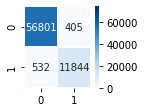

In [17]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9692173563141305
Test F1-score [0.98133615 0.91222031]
Test Precision [0.97835252 0.92549476]
Test Recall [0.98433804 0.89932127]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     24518
           1       0.93      0.90      0.91      5304

    accuracy                           0.97     29822
   macro avg       0.95      0.94      0.95     29822
weighted avg       0.97      0.97      0.97     29822



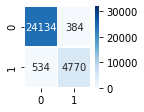

In [18]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [19]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

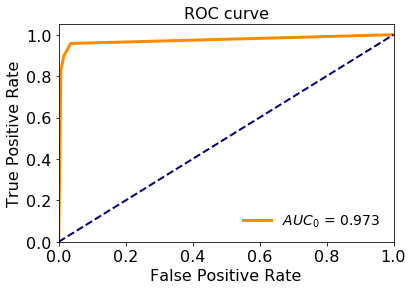

In [20]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [21]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

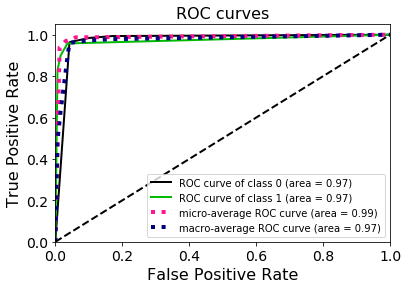

In [22]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

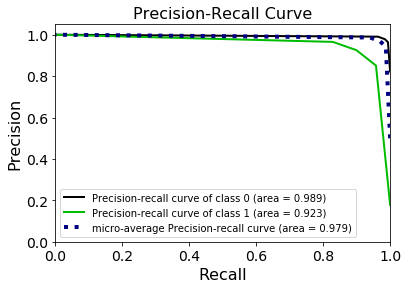

In [23]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

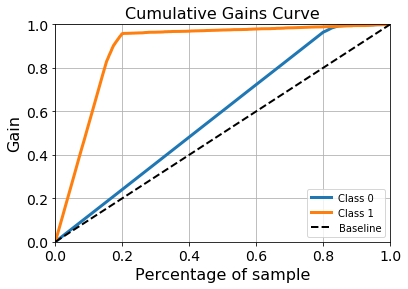

In [24]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

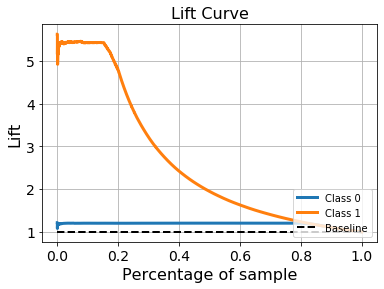

In [25]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

5 neighbors

In [26]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9749791612773419
Train F1-score [0.98481823 0.92890105]
Train Precision [0.98254772 0.93906366]
Train Recall [0.98709926 0.91895604]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     57206
           1       0.94      0.92      0.93     12376

    accuracy                           0.97     69582
   macro avg       0.96      0.95      0.96     69582
weighted avg       0.97      0.97      0.97     69582



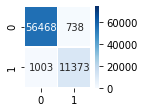

In [28]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9548990678022936
Test F1-score [0.97269535 0.87048628]
Test Precision [0.96831171 0.88958866]
Test Recall [0.97711885 0.85218703]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     24518
           1       0.89      0.85      0.87      5304

    accuracy                           0.95     29822
   macro avg       0.93      0.91      0.92     29822
weighted avg       0.95      0.95      0.95     29822



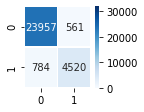

In [29]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [30]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

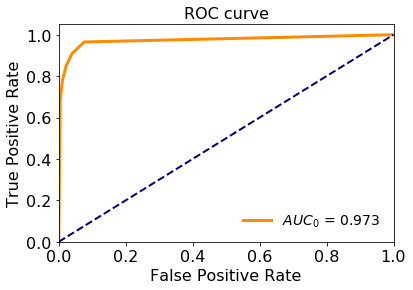

In [31]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

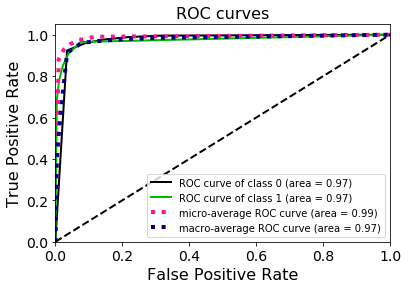

In [32]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

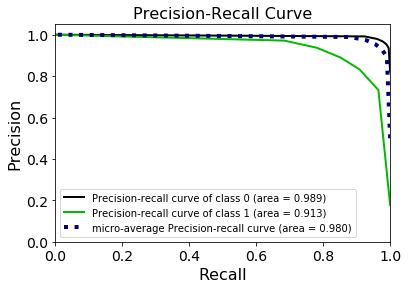

In [33]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

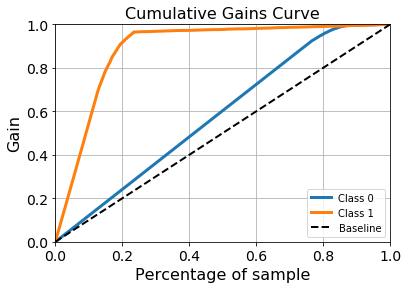

In [34]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

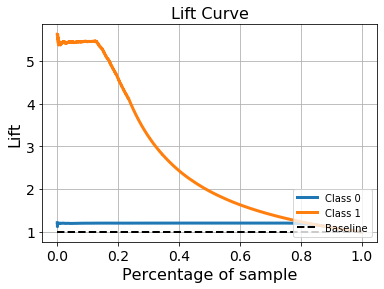

In [35]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

7 neighbors

In [36]:
clf = KNeighborsClassifier(n_neighbors=7, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9625190422810497
Train F1-score [0.97730161 0.89252452]
Train Precision [0.97318519 0.91076535]
Train Recall [0.98145299 0.875     ]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     57206
           1       0.91      0.88      0.89     12376

    accuracy                           0.96     69582
   macro avg       0.94      0.93      0.93     69582
weighted avg       0.96      0.96      0.96     69582



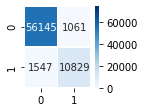

In [38]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9407819730400375
Test F1-score [0.96425825 0.82743795]
Test Precision [0.9570143  0.85882353]
Test Recall [0.97161269 0.79826546]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     24518
           1       0.86      0.80      0.83      5304

    accuracy                           0.94     29822
   macro avg       0.91      0.88      0.90     29822
weighted avg       0.94      0.94      0.94     29822



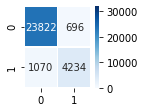

In [39]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [40]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

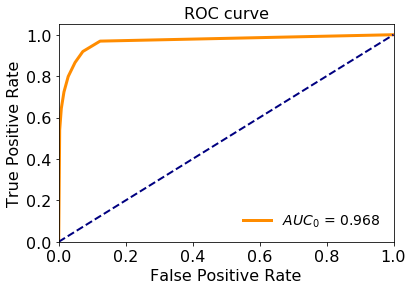

In [41]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

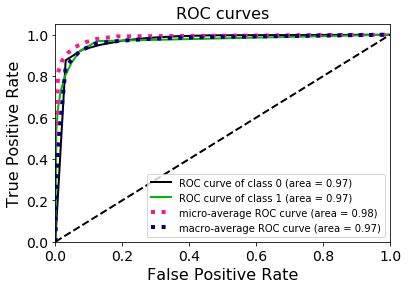

In [42]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

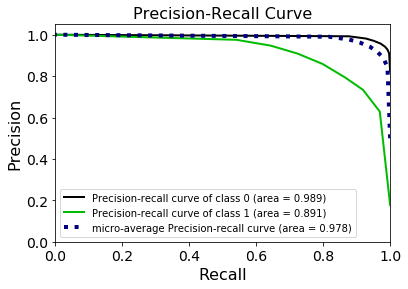

In [43]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

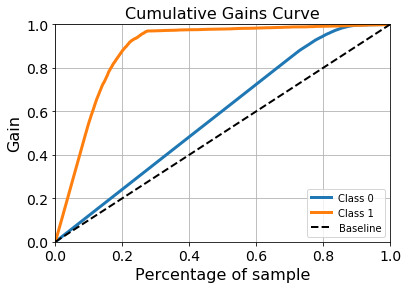

In [44]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

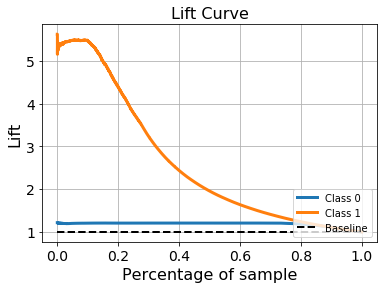

In [45]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

9 neighbors

In [46]:
clf = KNeighborsClassifier(n_neighbors=9, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [47]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.9487223707280619
Train F1-score [0.96903423 0.85096074]
Train Precision [0.96225309 0.88083708]
Train Recall [0.97591162 0.8230446 ]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     57206
           1       0.88      0.82      0.85     12376

    accuracy                           0.95     69582
   macro avg       0.92      0.90      0.91     69582
weighted avg       0.95      0.95      0.95     69582



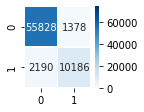

In [48]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.9274361209845081
Test F1-score [0.95632165 0.78574257]
Test Precision [0.94661552 0.82735613]
Test Recall [0.96622889 0.74811463]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     24518
           1       0.83      0.75      0.79      5304

    accuracy                           0.93     29822
   macro avg       0.89      0.86      0.87     29822
weighted avg       0.93      0.93      0.93     29822



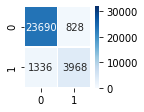

In [49]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [50]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

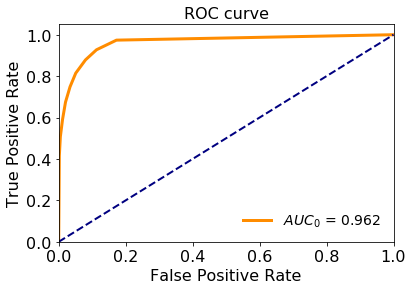

In [51]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

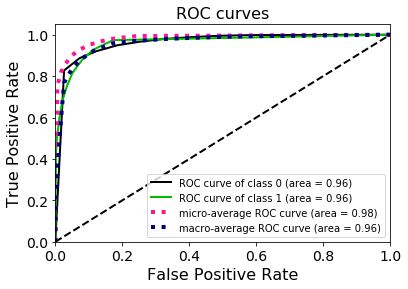

In [52]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

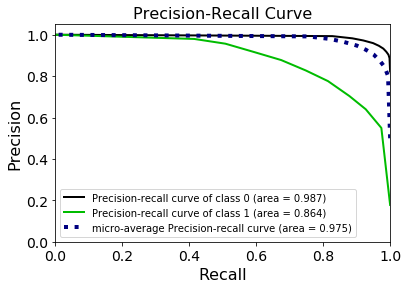

In [53]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

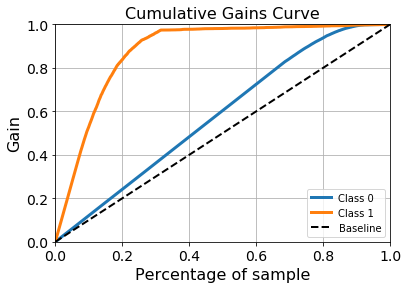

In [54]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

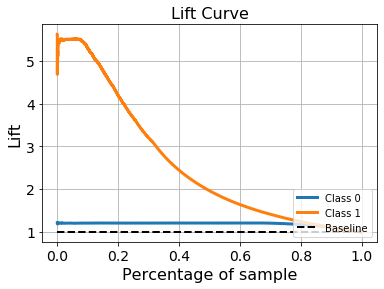

In [55]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [19]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [20]:
param_list = {'n_neighbors': np.arange(1, 50), # or random.randint(1,50,60)
              'weights': ['uniform', 'distance']
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list,
                                   n_iter=50, cv=5, random_state=0)
random_search.fit(X, y)
clf = random_search.best_estimator_
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.316 (std: 0.255)
Parameters: {'weights': 'uniform', 'n_neighbors': 46}

Model with rank: 2
Mean validation score: 0.315 (std: 0.255)
Parameters: {'weights': 'uniform', 'n_neighbors': 44}

Model with rank: 3
Mean validation score: 0.314 (std: 0.256)
Parameters: {'weights': 'uniform', 'n_neighbors': 40}



In [57]:
clf = KNeighborsClassifier(n_neighbors=46, weights='uniform')

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=46)

In [58]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

Train Accuracy 0.8647207611163806
Train F1-score [0.92222911 0.48077666]
Train Precision [0.87438312 0.75751782]
Train Recall [0.97561445 0.35213316]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     57206
           1       0.76      0.35      0.48     12376

    accuracy                           0.86     69582
   macro avg       0.82      0.66      0.70     69582
weighted avg       0.85      0.86      0.84     69582



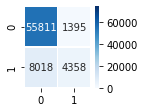

In [59]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred_tr, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
cf_matrix_train = confusion_matrix(y_train, y_pred_tr)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

Test Accuracy 0.8567835825900342
Test F1-score [0.91784169 0.4423554 ]
Test Precision [0.86856956 0.71932059]
Test Recall [0.97304022 0.3193816 ]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     24518
           1       0.72      0.32      0.44      5304

    accuracy                           0.86     29822
   macro avg       0.79      0.65      0.68     29822
weighted avg       0.84      0.86      0.83     29822



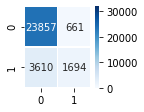

In [60]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [61]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

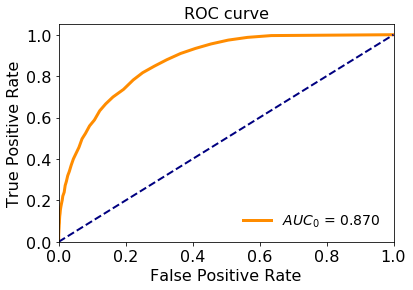

In [62]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

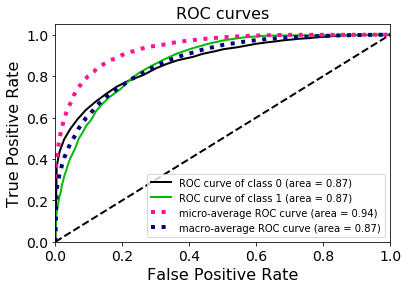

In [63]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

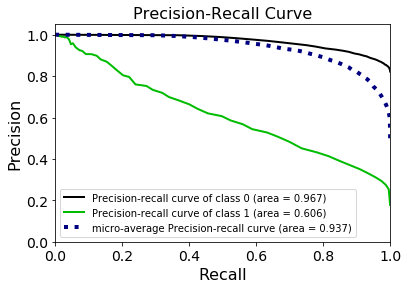

In [64]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

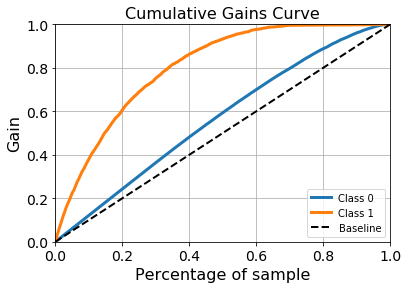

In [65]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

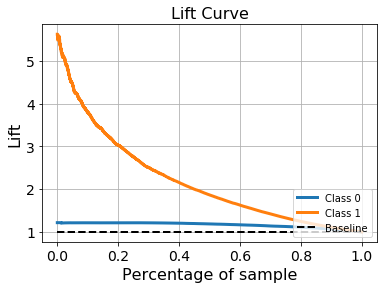

In [66]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Add an example from sklearn from lecture jupyter notebook

In [65]:
# Creating odd list K for KNN
neighbors = list(range(1,25,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [66]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 1


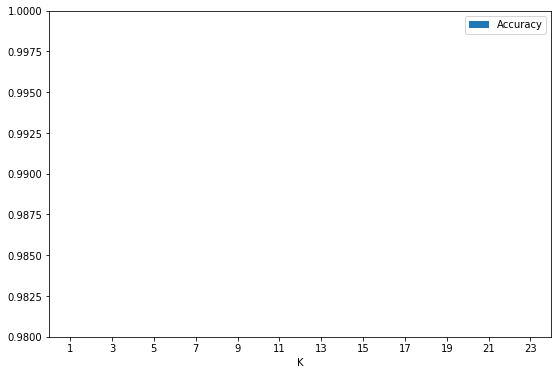

In [67]:
import matplotlib.pyplot as plt
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,25,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.98,1),rot=0)
    plt.show()
plot_accuracy(cv_scores)

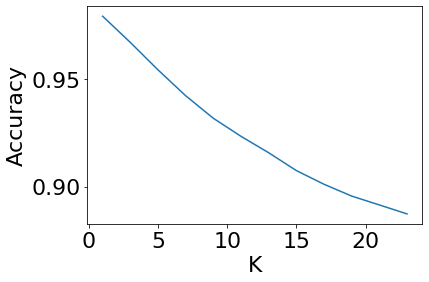

In [68]:
plt.plot(range(1,25,2), cv_scores)
plt.ylabel('Accuracy', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [69]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {'n_neighbors': np.arange(1, 25,2), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                         'weights': ['uniform', 'distance']})

In [71]:
clf = search.best_estimator_

y_score=clf.predict_proba(X_test)

y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.979075850043592
F1-score [0.98727881 0.94108761]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24518
           1       0.94      0.94      0.94      5304

    accuracy                           0.98     29822
   macro avg       0.96      0.96      0.96     29822
weighted avg       0.98      0.98      0.98     29822



In [72]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

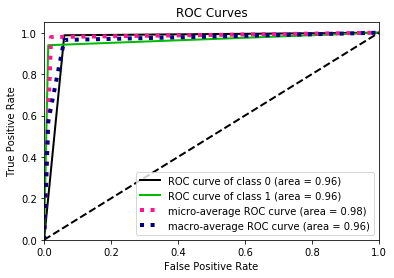

In [73]:
plot_roc(y_test, y_score)
plt.show()

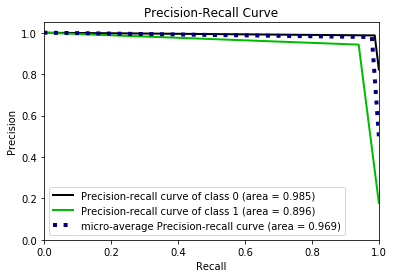

In [74]:
plot_precision_recall(y_test, y_score)
plt.show()

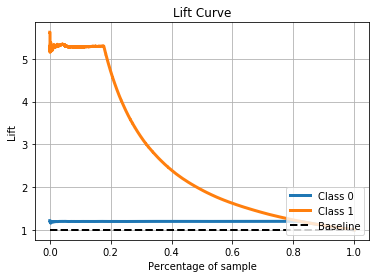

In [75]:
plot_lift_curve(y_test, y_score)
plt.show()

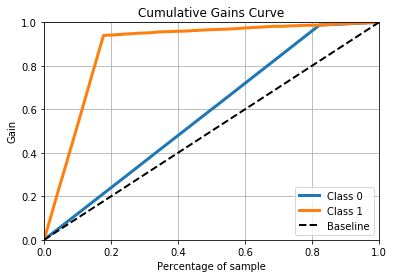

In [76]:
plot_cumulative_gain(y_test, y_score)
plt.show()

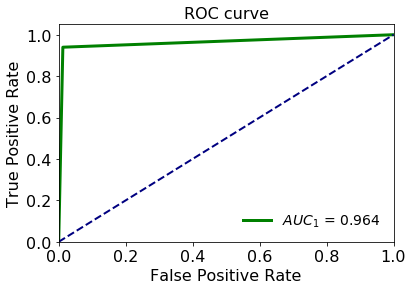

In [77]:
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()